<a href="https://colab.research.google.com/github/hersan19/AutoML_Keras/blob/main/Semana_2_Ana%CC%81lisis_de_ima%CC%81genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 2:

## Umbralización global y local



In [1]:
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


In [ ]:
base_url = "https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/"
carpetas = ["Real", "GT"]
def cargar_imagenes(carpeta, num_imagenes=8):
    imagenes = []
    for i in range(1, num_imagenes + 1):
        nombre_archivo = f"segmentacion_{i}.png"  # cambia a .jpg si es necesario
        url = f"{base_url}{carpeta}/{nombre_archivo}"
        print(f"Cargando: {url}")
        response = requests.get(url)
        if response.status_code == 200:
            imagen = Image.open(BytesIO(response.content)).convert("RGB")
            imagenes.append(imagen)
        else:
            print(f"No se pudo cargar {url}")
    return imagenes

In [ ]:
# Cargar imágenes de ambas carpetas
imgs_gt = cargar_imagenes("GT")
imgs_real = cargar_imagenes("Real")

Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_1.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_2.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_3.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_4.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_5.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_6.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_7.png
Cargando: https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/GT/segmentacion_8.png
Cargando: https://raw.gi

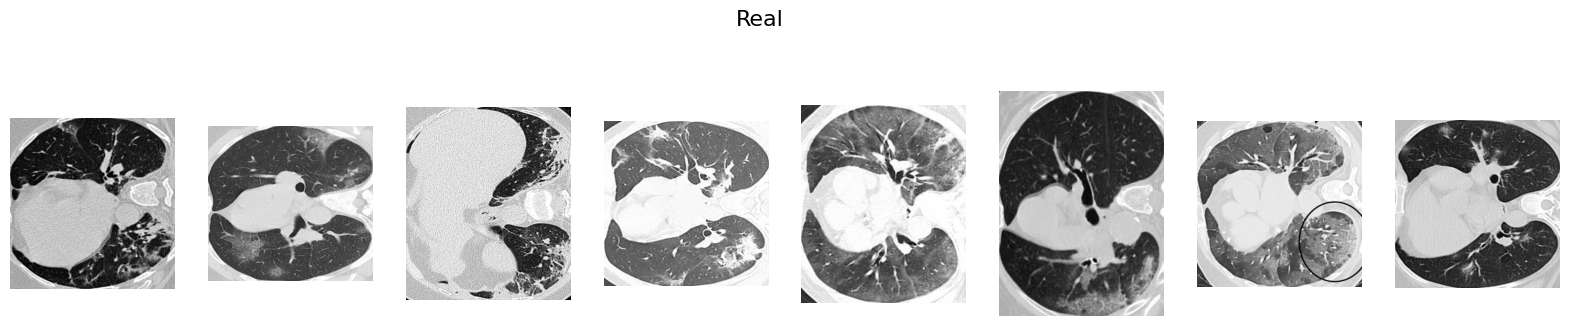

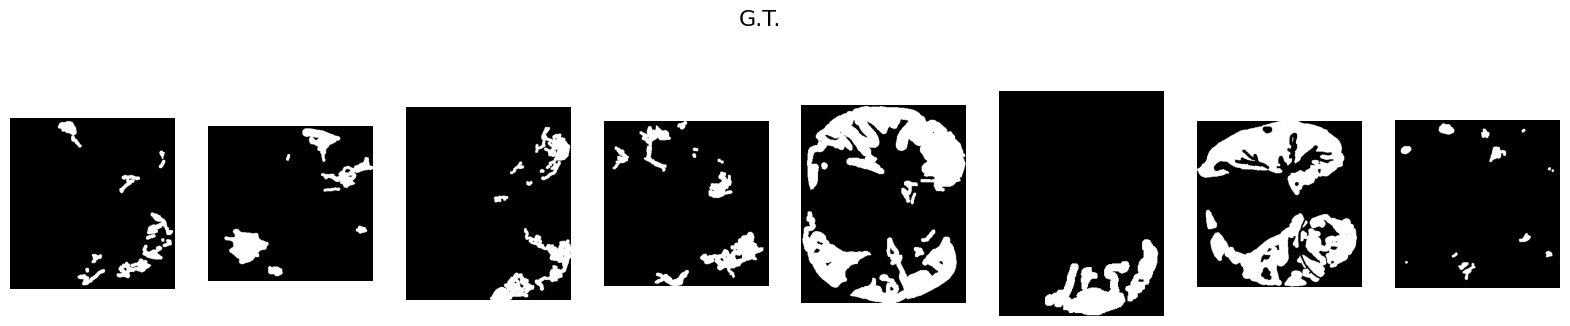

In [ ]:
def mostrar_imagenes(lista_imagenes, titulo):
    fig, axes = plt.subplots(1, len(lista_imagenes), figsize=(20, 4))
    fig.suptitle(titulo, fontsize=16)
    for ax, img in zip(axes, lista_imagenes):
        ax.imshow(img)
        ax.axis("off")
    plt.show()

mostrar_imagenes(imgs_real, "Real")
mostrar_imagenes(imgs_gt, "G.T.")

Utiliza una imagen llamada segmentacion_1.png y realiza lo siguiente:

Aplica la umbralización global utilizando el método de Otsu.
Aplica la umbralización adaptativa con un bloque de tamaño 11 y una constante de 2.
Muestra las imágenes resultantes.

In [ ]:
!wget https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/Real/segmentacion_1.png

--2026-01-30 22:46:13--  https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/Real/segmentacion_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29060 (28K) [image/png]
Saving to: ‘segmentacion_1.png’

segmentacion_1.png  100%[===================>]  28.38K  --.-KB/s    in 0.002s  

2026-01-30 22:46:13 (16.7 MB/s) - ‘segmentacion_1.png’ saved [29060/29060]



In [ ]:
import cv2
import numpy as np

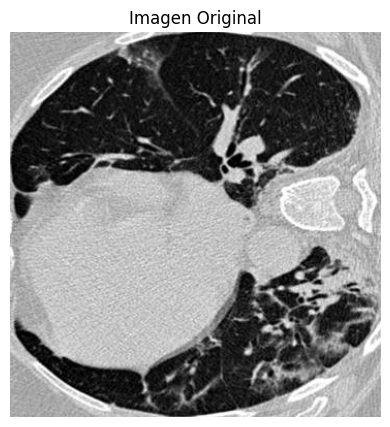

In [ ]:
img = cv2.imread("segmentacion_1.png",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")
plt.show()

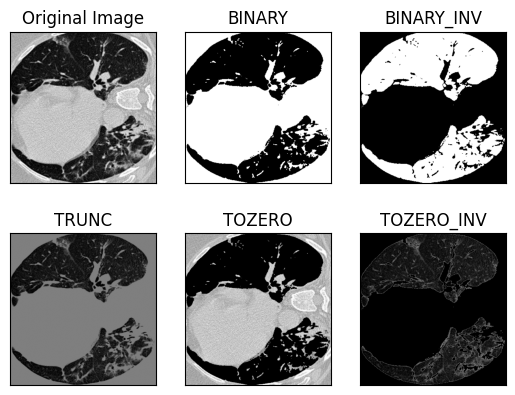

In [ ]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
ret, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','Otsu']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,otsu]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

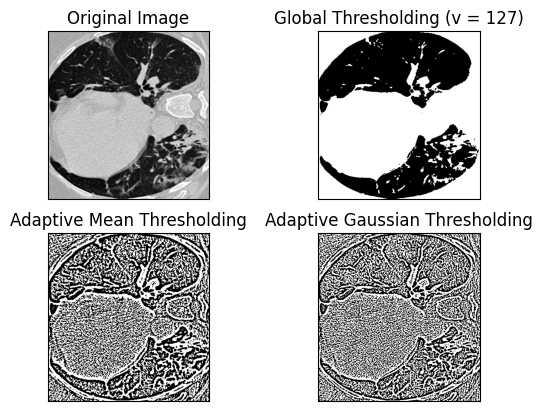

In [ ]:

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Segmentación utilizando Crecimiento de Regiones y Watershed

Nivel de Taxonomía de Bloom: Aplicación y Análisis Utilizando la misma imagen imagen_prueba.jpg, realiza lo siguiente:

Carga la imagen segmentatcion_2.png en escala de grises.
Implementa el algoritmo de crecimiento de regiones partiendo de una semilla ubicada en el centro de la imagen.
Aplica la transformación Watershed para segmentar la imagen.
Muestra las imágenes segmentadas resultantes.

In [ ]:
!wget https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/Real/segmentacion_2.png

--2025-05-24 17:21:22--  https://raw.githubusercontent.com/hersan19/UK_VisionPorComputadora/main/CT_COVID_19_small/Real/segmentacion_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32082 (31K) [image/png]
Saving to: ‘segmentacion_2.png.1’

segmentacion_2.png. 100%[===================>]  31.33K  --.-KB/s    in 0.001s  

2025-05-24 17:21:22 (43.2 MB/s) - ‘segmentacion_2.png.1’ saved [32082/32082]



In [ ]:
# Algoritmo de crecimiento de regiones

def region_growing(image, seed, threshold):
    rows, cols = image.shape
    segmented = np.zeros((rows, cols), np.uint8)
    segmented[seed[0], seed[1]] = 255
    pixel_list = [seed]

    seed_color = image[seed[0], seed[1]]

    while len(pixel_list) > 0:
        pix = pixel_list.pop(0)
        for i in range(pix[0]-1, pix[0]+2):
            for j in range(pix[1]-1, pix[1]+2):
                if i >= 0 and i < rows and j >= 0 and j < cols:
                    if segmented[i,j] == 0 and np.sum(np.abs(image[i,j] - seed_color)) < threshold:
                        segmented[i,j] = 255
                        pixel_list.append((i,j))

    return segmented

In [ ]:
image = cv2.imread("segmentacion_2.png",cv2.IMREAD_GRAYSCALE)
type(image)

numpy.ndarray

In [ ]:
seed = (image.shape[0]//3, image.shape[1]//3)  # Seed at the center of the image
seed = (20,300)

In [ ]:
region_grown = region_growing(image, seed, 30)

<ipython-input-75-4d42834ff6cf>:16: RuntimeWarning: overflow encountered in scalar subtract
  if segmented[i,j] == 0 and np.sum(np.abs(image[i,j] - seed_color)) < threshold:


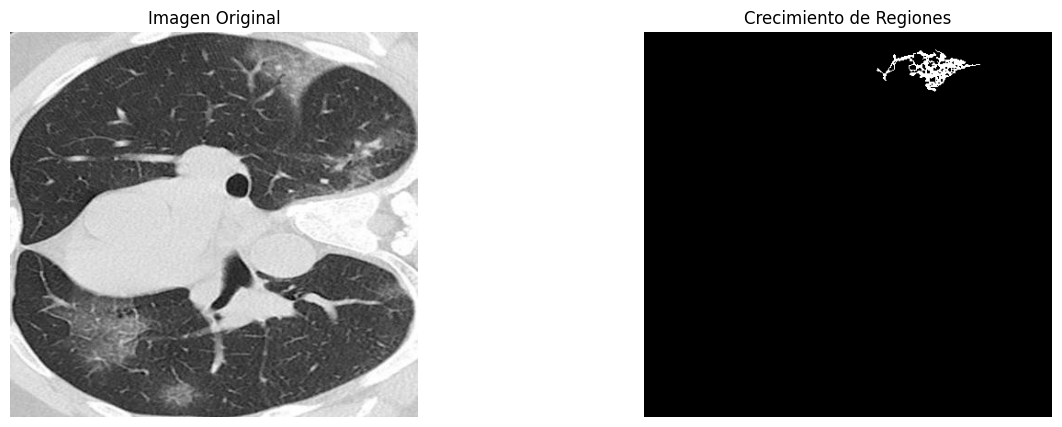

In [ ]:
# @title Muestra las imágenes segmentadas resultantes
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(region_grown, cmap="gray")
plt.title("Crecimiento de Regiones")
plt.axis("off")
plt.show()

In [ ]:
#img_gray = cv2.imread("segmentacion_3.png",cv2.IMREAD_GRAYSCALE)
#img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)



In [ ]:
# Aplica la transformación Watershed para segmentar la imagen

img_gray = cv2.imread("segmentacion_2.png",cv2.IMREAD_GRAYSCALE)

img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

markers = cv2.watershed(img_rgb, markers)
watershed_result = img_rgb.copy()
watershed_mask = np.uint8(markers > 1) * 255  # binarizar la región segmentada
watershed_result[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red

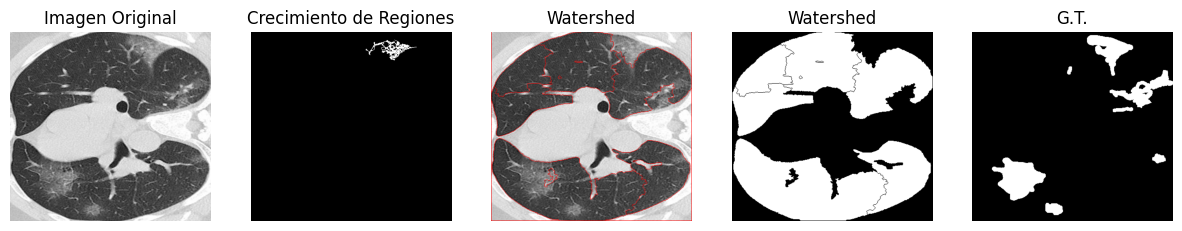

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
plt.imshow(img_gray, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")
plt.subplot(1,5,2)
plt.imshow(region_grown, cmap="gray")
plt.title("Crecimiento de Regiones")
plt.axis("off")
plt.subplot(1,5,3)
plt.imshow(watershed_result, cmap="gray")
plt.title("Watershed")
plt.axis("off")
plt.subplot(1,5,4)
plt.imshow(watershed_mask, cmap="gray")
plt.title("Watershed")
plt.axis("off")
plt.subplot(1,5,5)
plt.imshow(imgs_gt[1], cmap="gray")
plt.title("G.T.")
plt.axis("off")
plt.show()

# Segmentación de Imágenes Médicas con U-Net

## Introducción

U-Net es una arquitectura de red neuronal convolucional diseñada específicamente para la segmentación de imágenes biomédicas. Fue introducida por Olaf Ronneberger, Philipp Fischer y Thomas Brox en 2015, y desde entonces ha ganado una inmensa popularidad en el campo del análisis de imágenes médicas.

## Arquitectura U-Net

La arquitectura U-Net debe su nombre a su forma característica en "U". Consta de dos partes principales:

1. **Codificador (Encoder)**: También llamada la "ruta de contracción", esta parte reduce la resolución espacial de la imagen de entrada, capturando características de contexto.

2. **Decodificador (Decoder)**: También llamada la "ruta de expansión", esta parte recupera los detalles espaciales y produce una segmentación de alta resolución.

La característica clave de U-Net son las conexiones de salto (skip connections) que conectan capas correspondientes del codificador y el decodificador, permitiendo una combinación de características de bajo y alto nivel.

## Ventajas de U-Net

1. **Eficiente con datos limitados**: U-Net puede entrenarse eficazmente con relativamente pocas imágenes etiquetadas.

2. **Preservación de detalles**: Las conexiones de salto ayudan a preservar detalles finos en la segmentación.

3. **Versatilidad**: Aunque fue diseñada para imágenes biomédicas, U-Net se ha aplicado con éxito en diversos campos.

4. **Rapidez**: Una vez entrenada, U-Net puede realizar segmentaciones en tiempo real.

## Implementación

En el código proporcionado, hemos implementado una versión simplificada de U-Net utilizando TensorFlow y Keras:

1. **Definición del modelo**: La función `unet_model()` define la arquitectura U-Net.

2. **Compilación**: Utilizamos la pérdida de entropía cruzada binaria y el optimizador Adam.

3. **Entrenamiento**: Por simplicidad, usamos datos sintéticos para demostrar el proceso de entrenamiento.

4. **Visualización**: Mostramos las curvas de pérdida y precisión durante el entrenamiento.

## Aplicaciones en Imágenes Médicas

U-Net se ha aplicado con éxito en numerosas tareas de segmentación de imágenes médicas, incluyendo:

1. Segmentación de tumores cerebrales en imágenes de resonancia magnética.
2. Detección de lesiones en imágenes de retina.
3. Segmentación de órganos en tomografías computarizadas.
4. Análisis de células y estructuras en microscopía.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definición del modelo U-Net
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    up5 = layers.UpSampling2D(size=(2, 2))(conv4)
    up5 = layers.concatenate([up5, conv3])

    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = layers.UpSampling2D(size=(2, 2))(conv5)
    up6 = layers.concatenate([up6, conv2])
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    up7 = layers.concatenate([up7, conv1])
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv7)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
import torch
import torchvision.transforms as T
import numpy as np
from PIL import Image

def preparar_datos_unet(lista_imagenes, lista_masks, size=(256, 256)):
    """
    Prepara datos en escala de grises para U-Net en formato (N, 256, 256, 1).

    Parámetros:
    - lista_imagenes: lista de imágenes (PIL o np.ndarray)
    - lista_masks: lista de máscaras (PIL o np.ndarray)
    - size: tamaño de redimensionamiento (default: 256x256)

    Retorna:
    - x: numpy array de imágenes, shape (N, 256, 256, 1)
    - y: numpy array de máscaras, shape (N, 256, 256, 1)
    """
    x = []
    y = []

    for img, mask in zip(lista_imagenes, lista_masks):
        # Asegurar formato PIL
        if isinstance(img, np.ndarray):
            img = Image.fromarray(img)
        if isinstance(mask, np.ndarray):
            mask = Image.fromarray(mask)

        # Convertir a escala de grises y redimensionar
        img = img.convert('L').resize(size)
        mask = mask.convert('L').resize(size)

        # Convertir a array numpy y normalizar
        img_array = np.array(img, dtype=np.float32) / 255.0
        mask_array = np.array(mask, dtype=np.float32) / 255.0

        # Expandir canal: (256, 256) → (256, 256, 1)
        img_array = np.expand_dims(img_array, axis=-1)
        mask_array = np.expand_dims(mask_array, axis=-1)

        x.append(img_array)
        y.append(mask_array)

    # Convertir a arrays finales
    x = np.stack(x, axis=0)
    y = np.stack(y, axis=0)

    return x, y

X_train,y_train = preparar_datos_unet(imgs_real,imgs_gt)

In [ ]:
X_train.shape

(8, 256, 256, 1)

In [ ]:
"""def generate_fake_data(num_samples=100, img_height=256, img_width=256):
    X = np.random.rand(num_samples, img_height, img_width, 1)
    y = np.random.randint(0, 2, (num_samples, img_height, img_width, 1))
    return X, y
X_train, y_train = generate_fake_data()
X_train.shape"""


'def generate_fake_data(num_samples=100, img_height=256, img_width=256):\n    X = np.random.rand(num_samples, img_height, img_width, 1)\n    y = np.random.randint(0, 2, (num_samples, img_height, img_width, 1))\n    return X, y\nX_train, y_train = generate_fake_data()\nX_train.shape'

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) /
                (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return bce + d_loss

In [ ]:
model = unet_model()
model.compile(optimizer='adam', loss=dice_loss, metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 256, 256,  │        640 │ input_layer_7[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_106 (Conv2D) │ (None, 256, 256,  │     36,928 │ conv2d_105[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 128, 128,  │          0 │ conv2d_106[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_107 (Conv2D) │ (None, 128, 128,  │     73,856 │ max_pooling2d_21… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_108 (Conv2D) │ (None, 128, 128,  │    147,584 │ conv2d_107[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 64, 64,    │          0 │ conv2d_108[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_109 (Conv2D) │ (None, 64, 64,    │    295,168 │ max_pooling2d_22… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_110 (Conv2D) │ (None, 64, 64,    │    590,080 │ conv2d_109[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 32, 32,    │          0 │ conv2d_110[0][0]  │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_111 (Conv2D) │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_23… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_112 (Conv2D) │ (None, 32, 32,    │  2,359,808 │ conv2d_111[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_21    │ (None, 64, 64,    │          0 │ conv2d_112[0][0]  │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 64, 64,    │          0 │ up_sampling2d_21… │
│ (Concatenate)       │ 768)              │            │ conv2d_110[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_113 (Conv2D) │ (None, 64, 64,    │  1,769,728 │ concatenate_21[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_114 (Conv2D) │ (None, 64, 64,    │    590,080 │ conv2d_113[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_22    │ (None, 128, 128,  │          0 │ conv2d_114[0][0]

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.1012 - loss: 0.8148 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1639 - loss: 0.7135 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.1126 - loss: 0.7889 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.1616 - loss: 0.7174 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.1619 - loss: 0.7165 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.1123 - loss: 0.7898 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0880 - loss: 0.8262 - val_accuracy: 0.1735 - val_loss: 0.7121
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0891 - loss: 0.8218 - val_accuracy: 0.1735 - val_loss: 0.7121

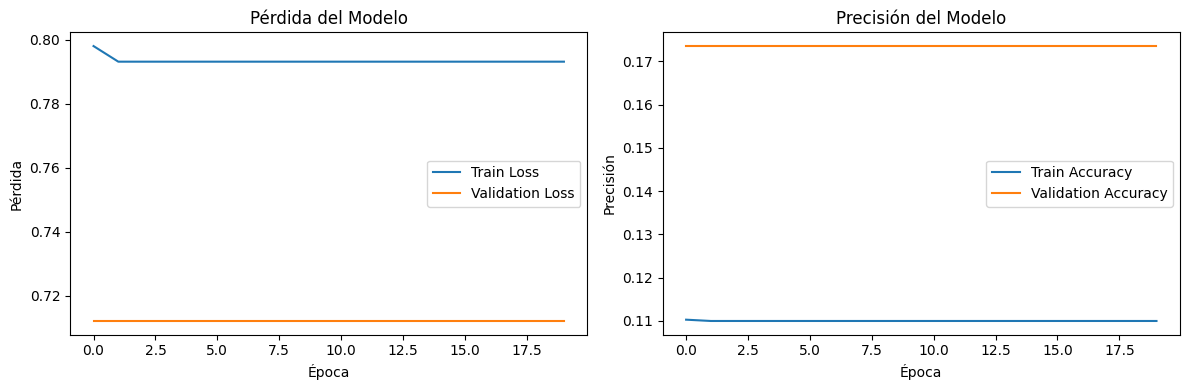

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, jaccard_score, f1_score

def predecir_y_plotear(model, imagen, mascara_real=None, size=(256, 256)):
    """
    Predice una máscara con un modelo U-Net, la plotea y calcula métricas si hay GT.

    Parámetros:
    - model: modelo U-Net compilado y entrenado.
    - imagen: imagen de entrada (PIL o np.ndarray), en escala de grises.
    - mascara_real: Ground Truth (PIL o np.ndarray), opcional.
    - size: tamaño de redimensionamiento.
    """
    # --- Preprocesamiento ---
    if isinstance(imagen, np.ndarray):
        imagen = Image.fromarray(imagen)
    imagen = imagen.convert('L').resize(size)
    img_array = np.array(imagen, dtype=np.float32) / 255.0
    img_input = np.expand_dims(img_array, axis=(0, -1))  # shape: (1, H, W, 1)

    # --- Predicción ---
    pred = model.predict(img_input)[0, :, :, 0]         # (256,256)
    pred_mask = (pred > 0.5).astype(np.uint8)

    # --- Ploteo ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Imagen original")
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')

    if mascara_real is not None:
        if isinstance(mascara_real, np.ndarray):
            mascara_real = Image.fromarray(mascara_real)
        mascara_real = mascara_real.convert('L').resize(size)
        mask_array = np.array(mascara_real, dtype=np.uint8)
        gt_bin = (mask_array > 127).astype(np.uint8)

        plt.subplot(1, 3, 2)
        plt.title("Máscara Real")
        plt.imshow(gt_bin, cmap='gray')
        plt.axis('off')
    else:
        gt_bin = None

    plt.subplot(1, 3, 3)
    plt.title("Predicción U-Net")
    plt.imshow(pred_mask, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # --- Métricas ---
    if gt_bin is not None:
        y_true = gt_bin.flatten()
        y_pred = pred_mask.flatten()

        acc = accuracy_score(y_true, y_pred)
        iou = jaccard_score(y_true, y_pred)
        dice = f1_score(y_true, y_pred)

        print(f"Accuracy: {acc:.4f}")
        print(f"IoU (Jaccard): {iou:.4f}")
        print(f"Dice Coefficient: {dice:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


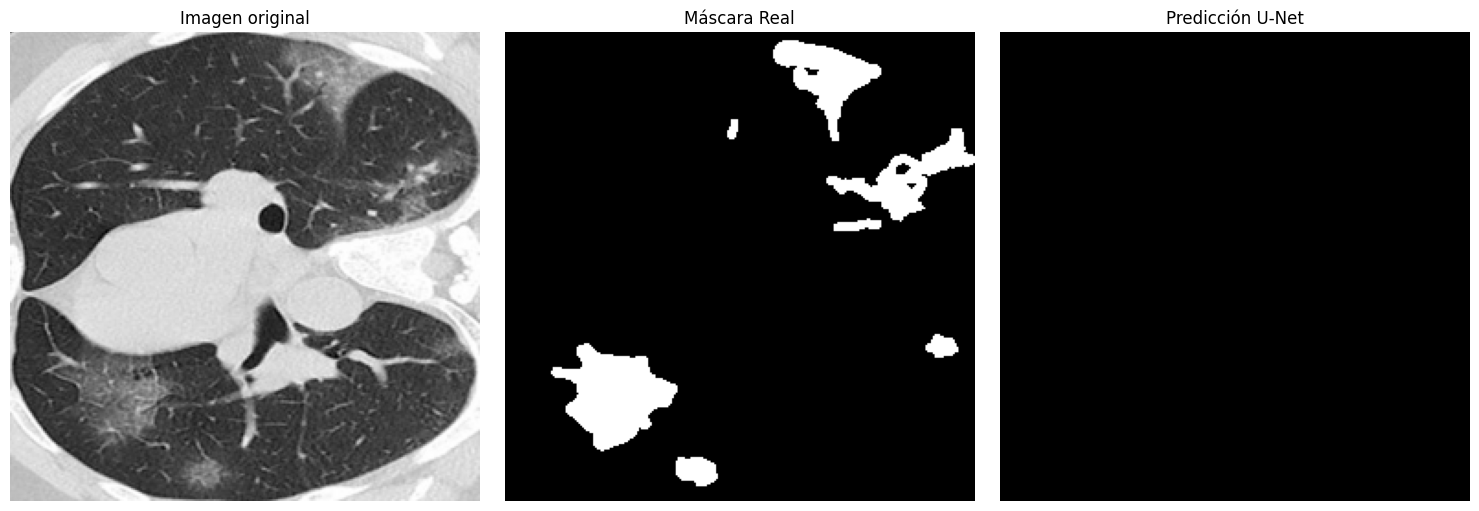

Accuracy: 0.0828
IoU (Jaccard): 0.0828
Dice Coefficient: 0.1530


In [ ]:
# Usando una imagen y máscara de prueba
predecir_y_plotear(model, imgs_real[1], mascara_real=imgs_gt[1])


#Segmentación con K-Means

In [ ]:

from sklearn.cluster import KMeans

def segmentar_kmeans(imagen, n_clusters=2, is_grayscale=True):
    """
    Segmenta una imagen usando K-means.

    Args:
        imagen: imagen como np.ndarray (puede ser RGB o escala de grises).
        n_clusters: número de clusters deseados.
        is_grayscale: True si la imagen es en escala de grises.

    Returns:
        mascara_segmentada: imagen segmentada como array de clusters.
    """
    # Convertir a RGB si está en escala de grises y se especifica
    if is_grayscale and len(imagen.shape) == 2:
        img_flat = imagen.reshape((-1, 1))
    else:
        img_flat = imagen.reshape((-1, 3))  # RGB

    # Normalizar y convertir a float32
    img_flat = np.float32(img_flat)

    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(img_flat)
    etiquetas = kmeans.labels_

    # Reconstruir imagen segmentada
    mascara_segmentada = etiquetas.reshape(imagen.shape[:2])

    return mascara_segmentada


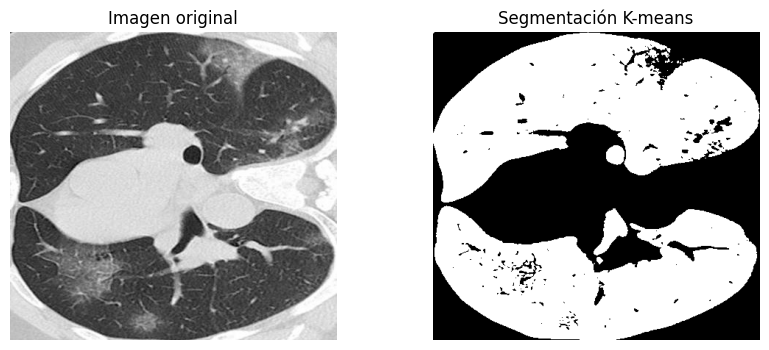

In [ ]:
imagen_2 = cv2.imread("segmentacion_2.png",cv2.IMREAD_GRAYSCALE)
mascara = segmentar_kmeans(imagen_2, n_clusters=2, is_grayscale=True)

# Mostrar resultados
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(imagen_2, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Segmentación K-means")
plt.imshow(mascara, cmap='gray')
plt.axis('off')
plt.show()

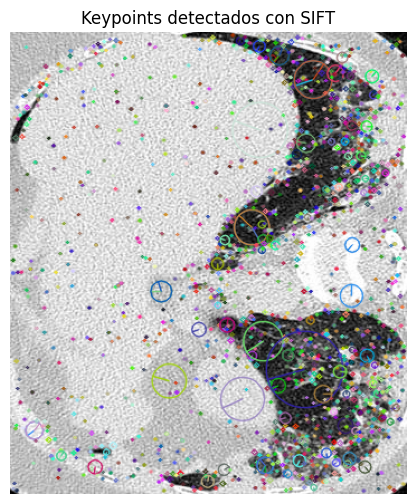

In [ ]:
imagen = cv2.imread('segmentacion_3.png', cv2.IMREAD_GRAYSCALE)

# Crear objeto SIFT (necesita OpenCV contrib)
sift = cv2.SIFT_create()

# Detectar keypoints y calcular descriptores
keypoints, descriptors = sift.detectAndCompute(imagen, None)

# Dibujar keypoints sobre la imagen
imagen_con_kp = cv2.drawKeypoints(imagen, keypoints, None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Mostrar la imagen con puntos clave
plt.figure(figsize=(10, 6))
plt.title("Keypoints detectados con SIFT")
plt.imshow(imagen_con_kp, cmap='gray')
plt.axis('off')
plt.show()